In [2]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import sys
sys.path.append('../pipeline')
%load_ext autoreload
%autoreload 2

In [4]:
df_train = pd.read_csv('data/onetwotrip_challenge_train.csv')
df_test = pd.read_csv('data/onetwotrip_challenge_test.csv')

In [5]:
data = pd.concat([df_train, df_test], axis=0, sort=False )

In [7]:
data = data.fillna(-1)

In [8]:
count = dict(data['userid'].value_counts())
data['count'] = data['userid'].apply(lambda x: count[x])

In [9]:
data['count'].value_counts().sort_index()

1      259504
2      138314
3       70359
4       41968
5       26210
        ...  
198       198
222       222
310       310
363       363
756       756
Name: count, Length: 114, dtype: int64

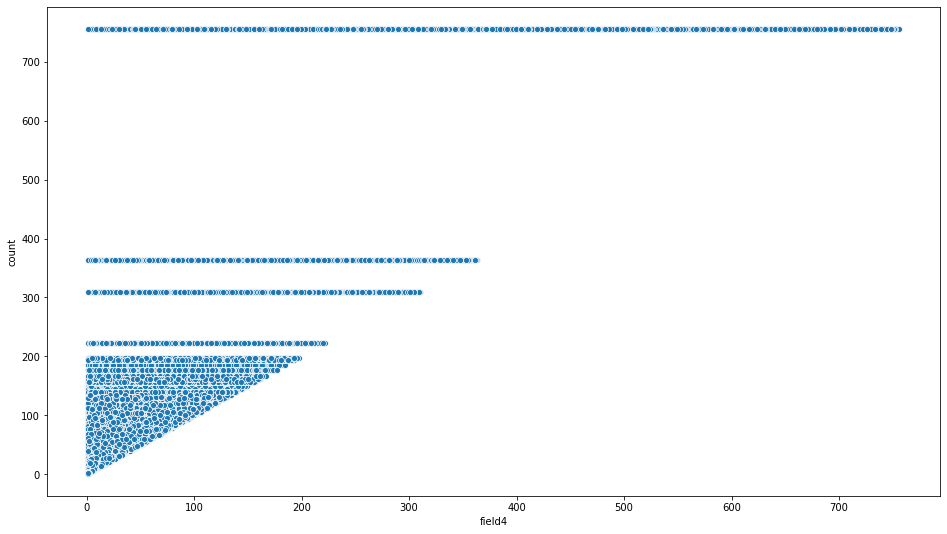

In [10]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='field4', y='count', data=data);

In [11]:
count

{'88a595f6f7754f656b33cca2c6addcb9c659c30bad00656779378af80209912a': 756,
 'a4837464e50075c4f8b5820dab011496ba1f04a985ab2782f5cafe6dda94ed52': 363,
 'd4017f49f9e5cebdefabef5714f138ea0fc72410d19ac9997d416dc96dc01f23': 310,
 '98e3b9eba8259c0fe0599cc0490a39e8d946942abcd43fa28ba1d2872f2a462b': 222,
 '2350f28919b7b4161f4e22c491cac8d5ae5347c4f52130b922651fbbb4f7381c': 198,
 'c2d39c54936961e415d536315954cf31d4a506334f65dfe96705297ca4d11a60': 193,
 'a78176edc05b37528c4b559870f1c29c5cf1b0d7b2906db8e0a323d2b83e0bf4': 185,
 '6f88521de0b6c0f34e8c6675387055bc4b62331e681b5676549cadd149073f67': 177,
 '739eafb20f821b94d1d22146706a6c4d0375de292cd21ba3b6ba3278dc54fc93': 177,
 '350bc1455fa1adeef3346b956f87e23252b751efdbdec5b81d40fc8f4e5c2d2a': 167,
 '38188de7f244abad2947d65f588a7ea7818f465d9a63871fdf7fa2444318e7e1': 161,
 '4ff6d90fa7505838ff071e9a9e01208f5dfd3f5f237c74ff2e62c85a42522402': 157,
 '13a81409741819982c3bbc5452664081bfe7687c3c188ae4734d3c653985a1fa': 149,
 'e139cfdfd8ccc2813af314294b72bcf5b2c0

In [12]:
top_users = data[data['count']>100]['userid'].value_counts()

# Гипотеза: Field12 -- место вылета, проверяем сезонность

In [13]:
for month in range(1,13):
    print('----------   ',month)
    print(data[data['field3']==month]['field12'].value_counts().iloc[:5])

----------    1
4    6242
3    4242
9    4190
8    4038
5    3416
Name: field12, dtype: int64
----------    2
4    3572
9    2577
3    2123
8    2008
1    1541
Name: field12, dtype: int64
----------    3
4    4295
9    2616
3    2109
8    2101
5    1522
Name: field12, dtype: int64
----------    4
4    4609
8    2214
9    1958
3    1879
5    1203
Name: field12, dtype: int64
----------    5
4    3958
8    2486
9    1753
3    1658
5    1147
Name: field12, dtype: int64
----------    6
4    10490
5     8222
2     7069
3     5775
8     5368
Name: field12, dtype: int64
----------    7
5    15093
4    15011
2    11581
3    10371
8     8516
Name: field12, dtype: int64
----------    8
5    15273
4    14018
2    11988
3     9322
8     8629
Name: field12, dtype: int64
----------    9
4    13451
5    10872
8    10395
3     8921
2     8112
Name: field12, dtype: int64
----------    10
4    15719
5     9546
3     8475
8     8380
9     6395
Name: field12, dtype: int64
----------    11
4    13085
5     

In [14]:
top_places = [4,5,8,9,3,2]

No handles with labels found to put in legend.


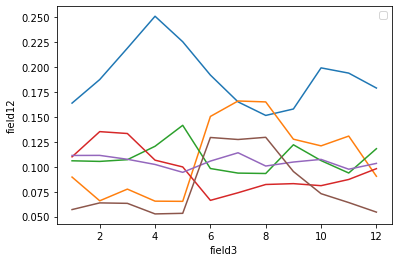

In [21]:
flights_by_month = data.groupby('field3')['field12'].agg('count')
for place in top_places:
#     place=4
    place_stat=     data[data['field12']==place].groupby('field3')['field12'].agg('count') / flights_by_month
    sns.lineplot(y=place_stat,x=place_stat.index)
plt.legend()

In [19]:
place_stat

field3
1     0.163793
2     0.187408
3     0.218876
4     0.250898
5     0.225334
6     0.191924
7     0.165025
8     0.151443
9     0.157896
10    0.199139
11    0.193869
12    0.178917
Name: field12, dtype: float64

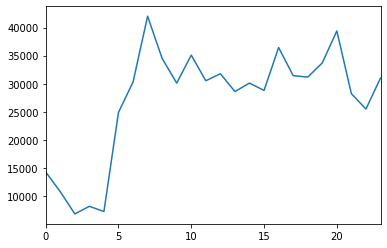

In [24]:
data['field23'].value_counts().sort_index().plot()

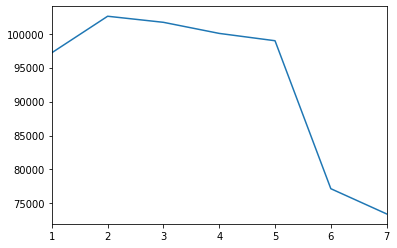

In [26]:
data['field18'].value_counts().sort_index().plot()

In [63]:
data[data['field12']==place].groupby('field3')['field12'].agg('count')#.plot()

field3
1      2174
2      1215
3      1242
4       968
5       936
6      7069
7     11581
8     11988
9      8112
10     5761
11     4325
12     3736
Name: field12, dtype: int64

field3
1     38109
2     19060
3     19623
4     18370
5     17565
6     54657
7     90962
8     92563
9     85189
10    78935
11    67494
12    68540
Name: field12, dtype: int64